In [1]:
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import hashlib


In [266]:
slice_width = 2# lowers horizontal res
file_name = 'klara_4k_55fps.MOV'
file_loc = f'./projects/bajour/01_input/{file_name}'
pixel_v_coordinate = 500
# max_idle_space = 100
upsample_flag = True

In [267]:

def upsample(new_line):
#     print('Original Dimensions : ',new_line.shape)
    scale_percent = 150 # percent of original size
    width = int(new_line.shape[1] * scale_percent / 100)
    height = int(new_line.shape[0])
    dim = (width, height)
    # resize image
    resized = cv2.resize(new_line, dim, interpolation = cv2.INTER_AREA)
#     print('Resized Dimensions : ',resized.shape)
    return np.array([x[:width] for x in resized])

In [268]:

video = cv2.VideoCapture(file_loc)
w_video = int(video.get(cv2.CAP_PROP_FRAME_WIDTH ))
h_video = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT ))
frames_counter = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
# output_frame = Image.new("RGB", (frames_counter,h))
output_frame = []
idle_counter= 0
prev_line = [0]
delta = 100
all_delta = []
with tqdm(total=frames_counter) as pbar:
    while True:
        read, frame= video.read()
        pbar.update(1)
        if not read:
            break
        h,w,c = frame.shape        # todo opt     
        new_line = np.array([x[pixel_v_coordinate:(pixel_v_coordinate+slice_width)][0][::-1] for x in frame]).astype('uint8').reshape(h, -1, c)
        if upsample_flag:
            new_line = upsample(new_line)
        # skip similarzx
#         delta = np.mean([np.mean(x-y)> 50 for x,y in zip(new_line,prev_line)])
#         all_delta.append(delta)
#         if delta <9000 :
#             idle_counter+=1
#             if idle_counter<max_idle_space:
#                 pass
#             else:
#                 print('skip')
#                 continue
#         else:
#             idle_counter= 0
#             prev_line = new_line
        for _ in range(slice_width):
            output_frame.append(new_line)


1199it [00:14, 80.65it/s]                                                                                                                                                                                                               


In [269]:
output_frame_array = np.array(output_frame[::-1])
output_frame_array_reshape = output_frame_array.reshape(-1,h_video,3)
pil_img = Image.fromarray(output_frame_array_reshape).convert('RGB')
pil_img_final = pil_img.transpose(Image.ROTATE_90).rotate(180)



/var/folders/lt/7_tkjv012yn6rr8jr6rsdl2w0000gn/T/ipykernel_3254/1801358764.py:4: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  pil_img_final = pil_img.transpose(Image.ROTATE_90).rotate(180)


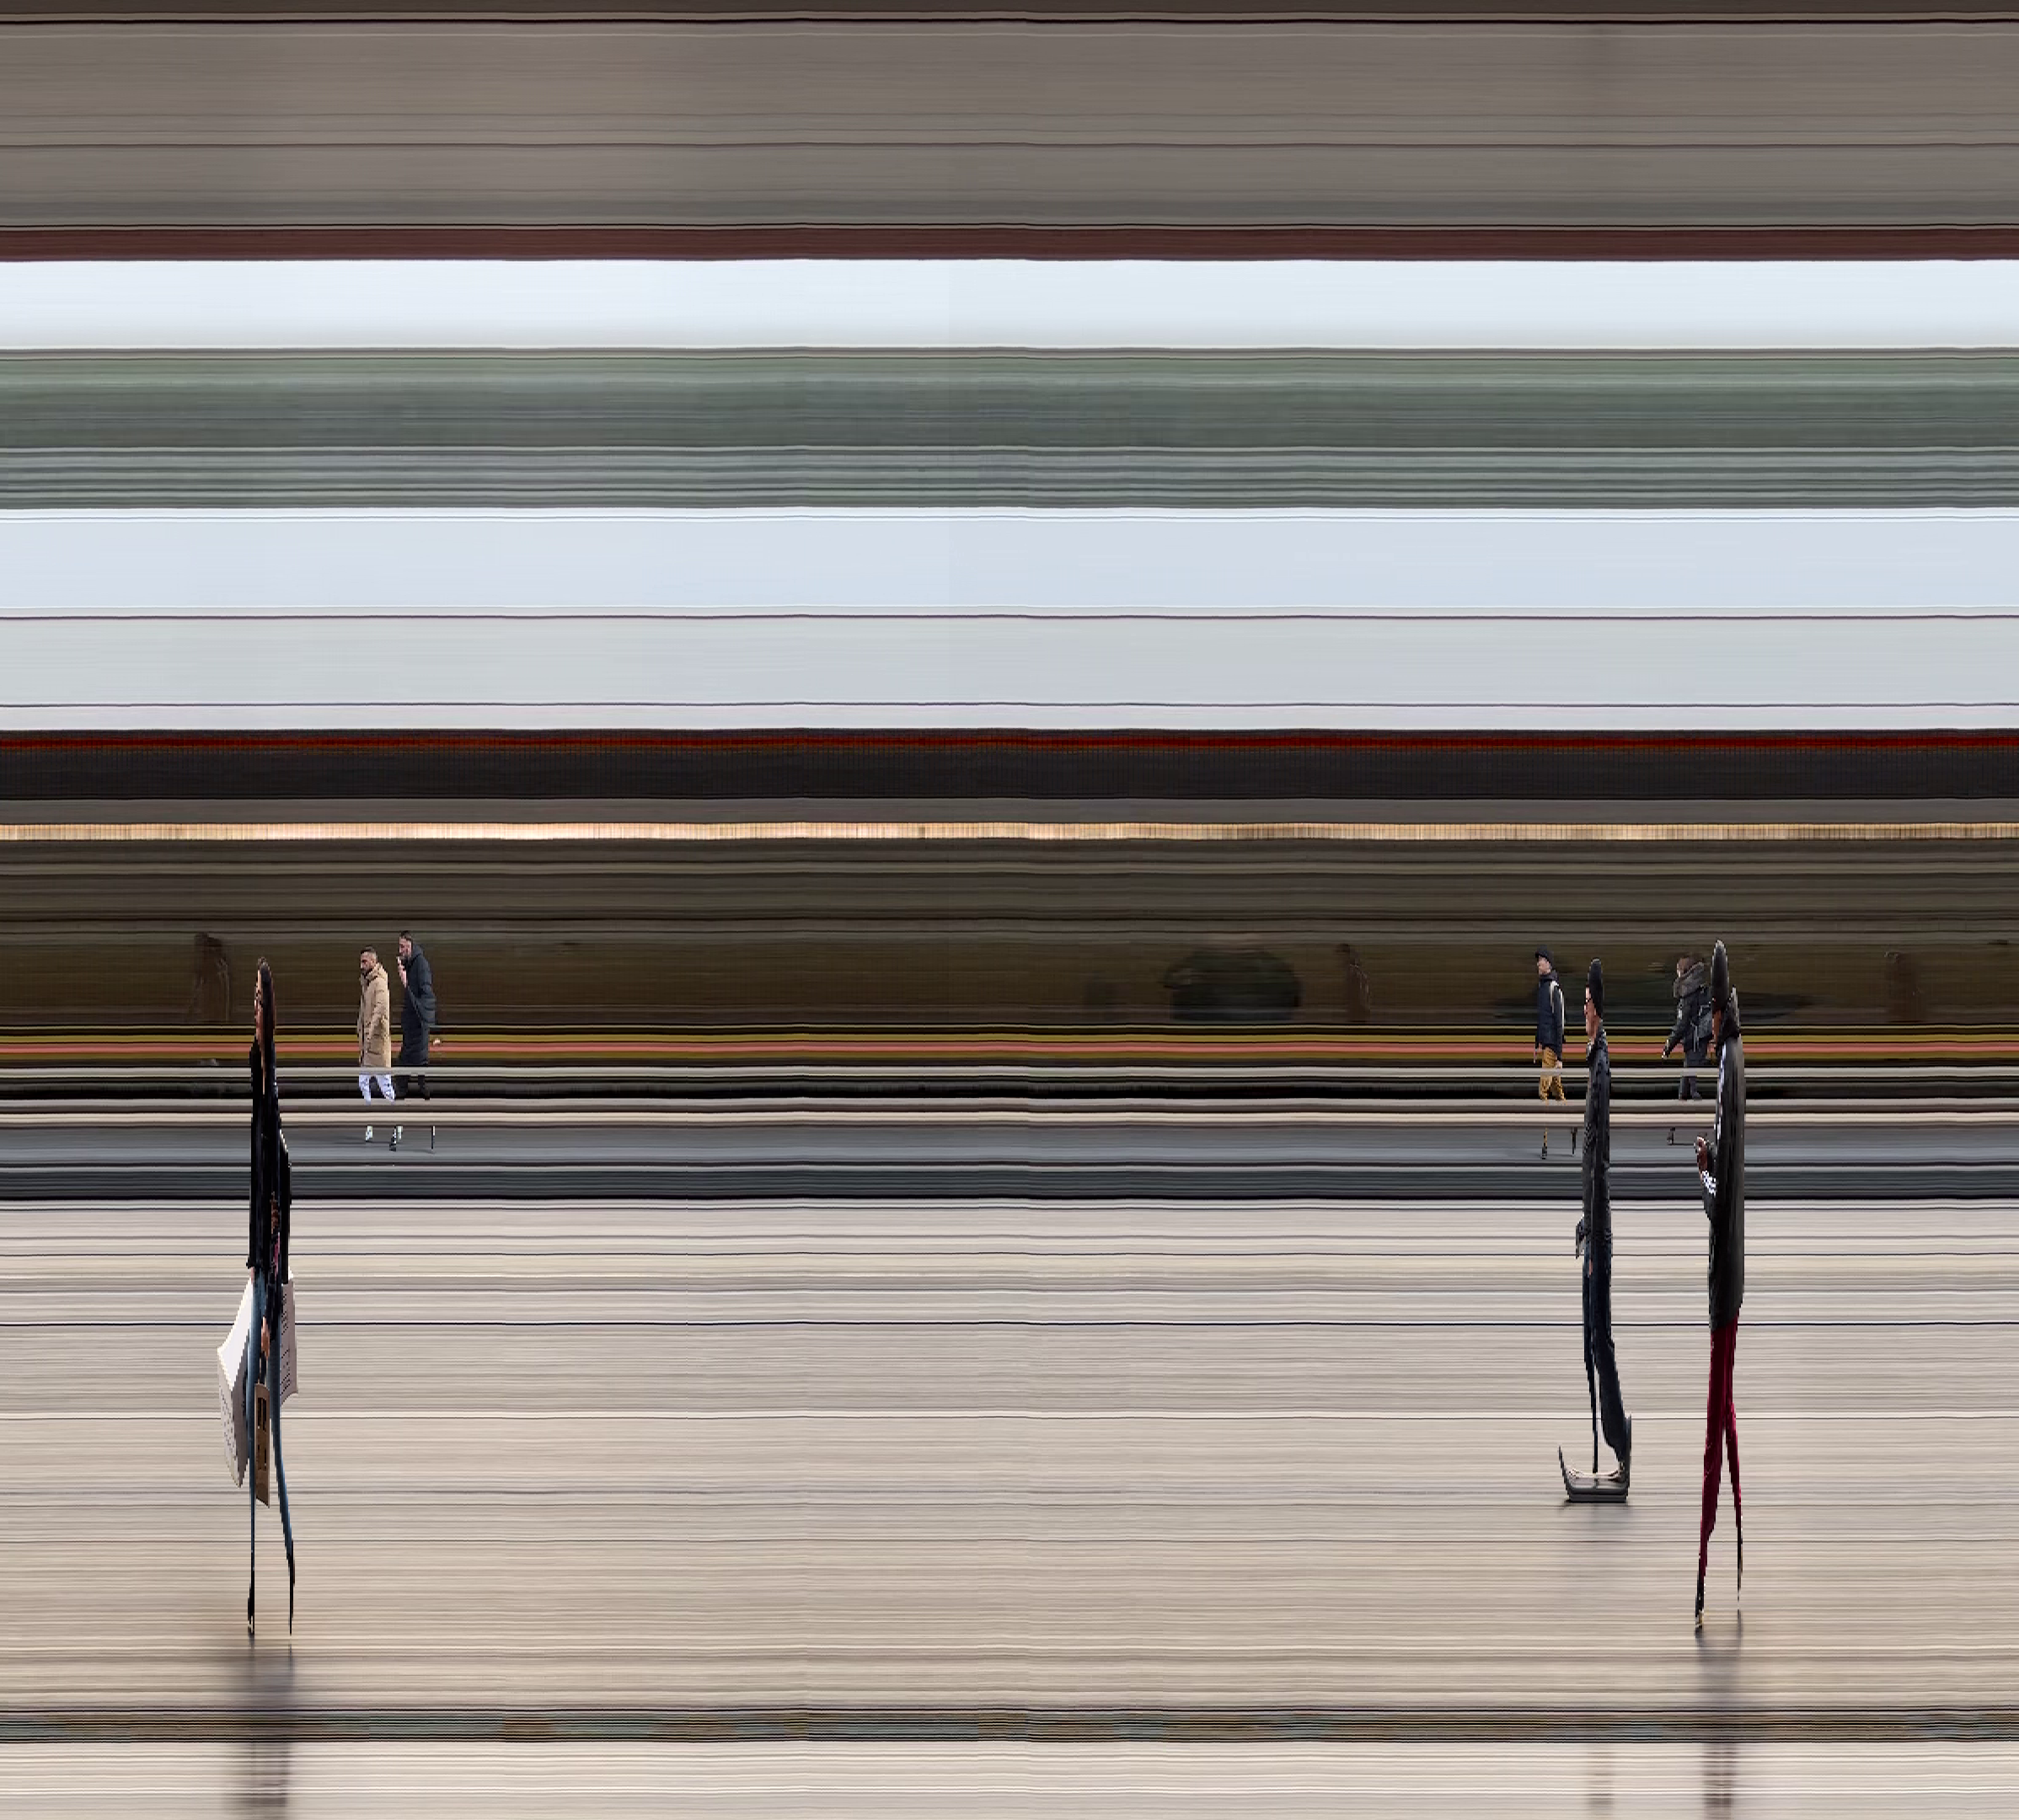

In [270]:
pil_img_final

In [271]:


if upsample_flag:
    pil_img_final.save(f"./projects/bajour/{file_name.split('.')[0]}_upsample.png","PNG")
else:
    pil_img_final.save(f"./projects/bajour/{file_name.split('.')[0]}.png","PNG")
